# Analyse Digits dataset from sklearn

### Requirements

In [236]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, adjusted_rand_score, confusion_matrix, adjusted_rand_score, homogeneity_score, completeness_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from skimpy import skim

### Load dataset

In [237]:
digits = load_digits()
X, y = digits.data, digits.target

# Normalise data between 0 and 1
X = X / 16.0  

### Analyse data

In [238]:
# Check data shape
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [239]:
# Check data type 
print(X.dtype)
print(y.dtype)

float64
int64


In [240]:
df = pd.DataFrame(X)
df['target'] = y
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1797   │ │ float64     │ 64    │                                                          │
│ │ Number of columns │ 65     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column   ┃ NA  ┃ NA %   ┃ mean        ┃ sd         ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ 0        │   0 │      0 │           0 │          0 │   0 │       0 │       0 │       0 │       0 │     █   │  │
│ │ 1        │   0 │      0 │     0.01899 │     0.0567 │   0 │       0 │       0 │       0 │     0.5 │    █    │  │
│ │ 2        │   0 │      0 │      0.3253 │     0.2972 │   0 │  0.0625 │    0.25 │  0.5625 │       1 │ █▄▂▃▂▁  │  │
│ │ 3        │   0 │      0 │      0.7397 │     0.2656 │   0 │   0.625 │  0.8125 │  0.9375 │       1 │ ▁▁▁▂▅█  │  │
│ │ 4        │   0 │      0 │      0.7405 │      0.268 │   0 │   0.625 │  0.8125 │  0.9375 │       1 │ ▁▁▁▂▄█  │  │
│ │ 5        │   0 │      0 │      0.3614 │     0.3542 │   0 │       0 │    0.25 │  0.6875 │       1 │ █▃▁▂▂▃  │  │
│ │ 6        │   0 │      0 │     0.08514 │     0.2079 │   0 │       0 │       0 │       0 │       1 │   █▁    │  │
│ │ 7        │   0 │      0 │    0.008104 │    0.06484 │   0 │       0 │       0 │       0 │  0.9375 │    █    │  │
│ │ 8        │   0 │      0 │   0.0003478 │   0.005889 │   0 │       0 │       0 │       0 │   0.125 │    █    │  │
│ │ 9        │   0 │      0 │      0.1246 │     0.1998 │   0 │       0 │       0 │  0.1875 │       1 │  █▂▁▁   │  │
│ │ 10       │   0 │      0 │      0.6489 │     0.3388 │   0 │   0.375 │    0.75 │  0.9375 │       1 │ ▃▂▁▂▄█  │  │
│ │ 11       │   0 │      0 │      0.7487 │     0.2486 │   0 │  0.5625 │  0.8125 │       1 │       1 │  ▁▁▃▄█  │  │
│ │ 12       │   0 │      0 │      0.6425 │     0.2989 │   0 │  0.4375 │  0.6875 │  0.9375 │       1 │ ▂▃▂▅▅█  │  │
│ │ 13       │   0 │      0 │       0.511 │     0.3783 │   0 │   0.125 │  0.5625 │   0.875 │       1 │ █▃▂▃▅█  │  │
│ │ 14       │   0 │      0 │      0.1154 │     0.2241 │   0 │       0 │       0 │   0.125 │       1 │  █▁ ▁   │  │
│ │ 15       │   0 │      0 │    0.006747 │    0.05174 │   0 │       0 │       0 │       0 │    0.75 │    █    │  │
│ │ 16       │   0 │      0 │   0.0001739 │   0.003898 │   0 │       0 │       0 │       0 │   0.125 │    █    │  │
│ │ 17       │   0 │      0 │      0.1626 │     0.2235 │   0 │       0 │  0.0625 │    0.25 │       1 │  █▂▁▁   │  │
│ │ 18       │   0 │      0 │      0.6189 │     0.3557 │   0 │  0.3125 │    0.75 │  0.9375 │       1 │ ▄▂▁▂▄█  │  │
│ │ 19       │   0 │      0 │       0.437 │     0.3627 │   0 │  0.0625 │   0.375 │    0.75 │       1 │ █▃▂▃▂▅  │  │
│ │ 20       │   0 │      0 │      0.4436 │      0.386 │   0 │  0.0625 │   0.375 │  0.8125 │       1 │ █▂▁▂▂▅  │  │
│ │ 21       │   0 │      0 │      0.4879 │     0.3873 │   0 │       0 │     0.5 │   0.875 │       1 │ █▂▁▃▄▇  │  │
│ │ 22       │   0 │      0 │      0.1118 │     0.2037 │

### Display empty columns

<Axes: >

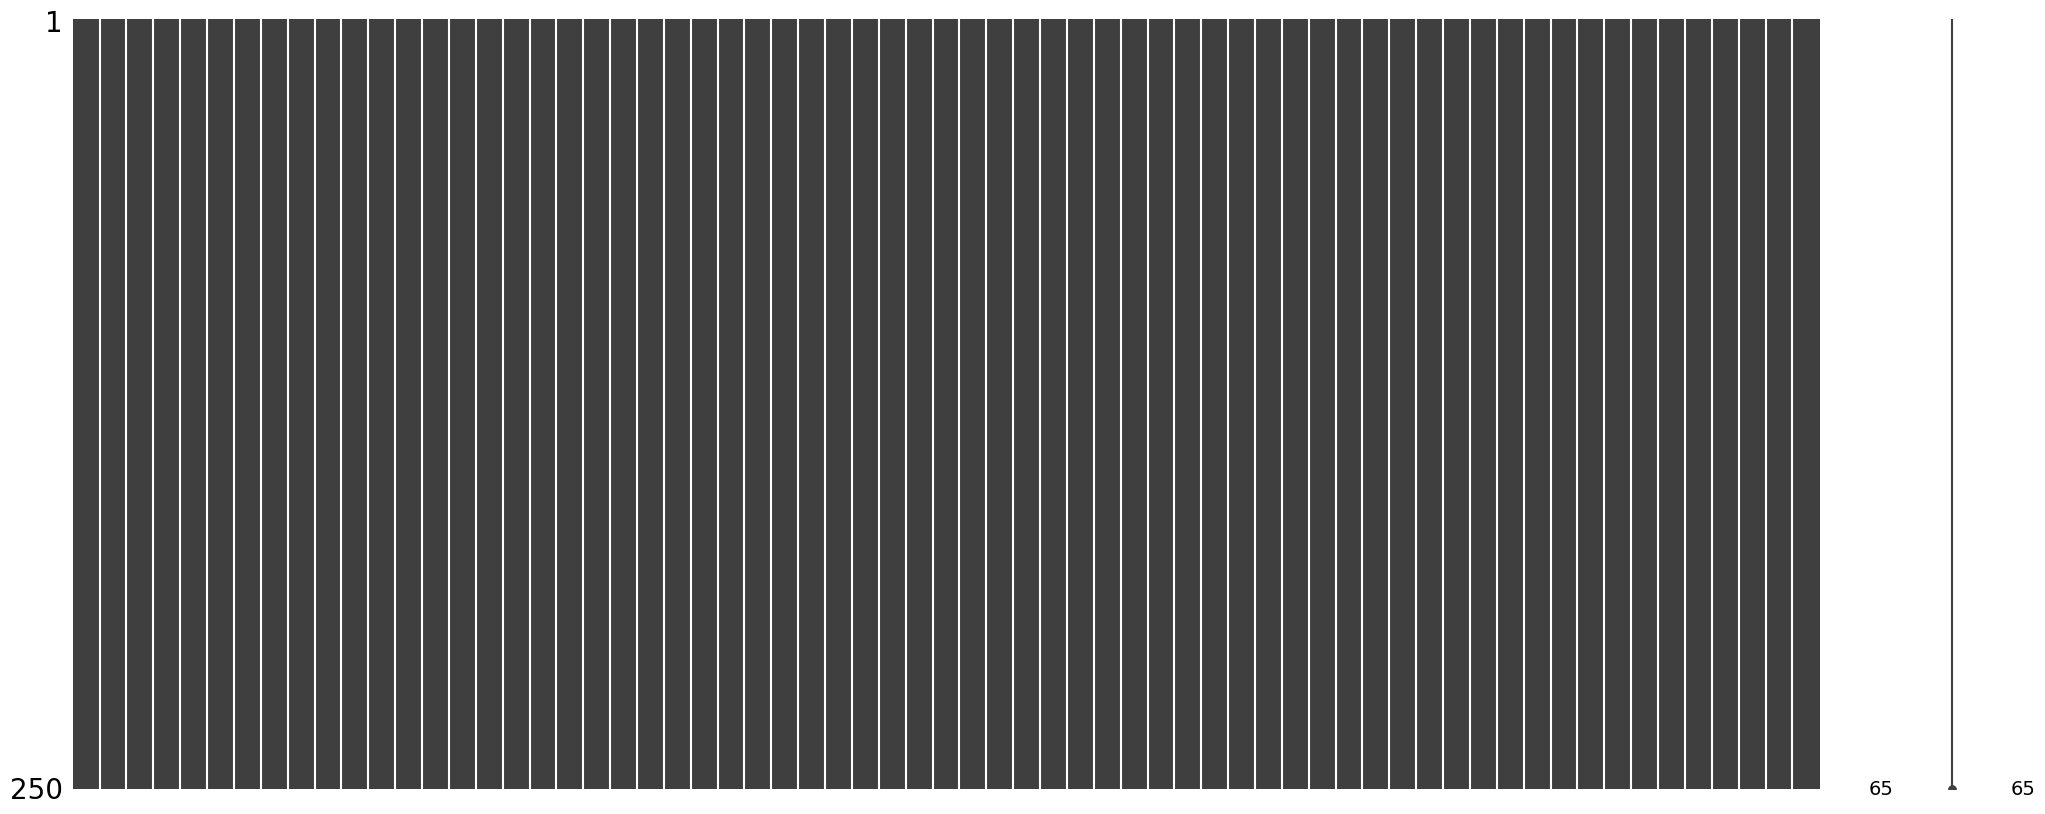

In [241]:
%matplotlib inline
msno.matrix(df.sample(250))

### Display negative values

In [242]:
negative_cols = (df < 0).any()

print("Has negative values :\n")
for col, has_negative in negative_cols.items():
    status = "❌ Yes" if has_negative else "✅ No"
    print(f"- {col:<12}: {status}")

Has negative values :

- 0           : ✅ No
- 1           : ✅ No
- 2           : ✅ No
- 3           : ✅ No
- 4           : ✅ No
- 5           : ✅ No
- 6           : ✅ No
- 7           : ✅ No
- 8           : ✅ No
- 9           : ✅ No
- 10          : ✅ No
- 11          : ✅ No
- 12          : ✅ No
- 13          : ✅ No
- 14          : ✅ No
- 15          : ✅ No
- 16          : ✅ No
- 17          : ✅ No
- 18          : ✅ No
- 19          : ✅ No
- 20          : ✅ No
- 21          : ✅ No
- 22          : ✅ No
- 23          : ✅ No
- 24          : ✅ No
- 25          : ✅ No
- 26          : ✅ No
- 27          : ✅ No
- 28          : ✅ No
- 29          : ✅ No
- 30          : ✅ No
- 31          : ✅ No
- 32          : ✅ No
- 33          : ✅ No
- 34          : ✅ No
- 35          : ✅ No
- 36          : ✅ No
- 37          : ✅ No
- 38          : ✅ No
- 39          : ✅ No
- 40          : ✅ No
- 41          : ✅ No
- 42          : ✅ No
- 43          : ✅ No
- 44          : ✅ No
- 45          : ✅ No
- 46       

### Display outliers

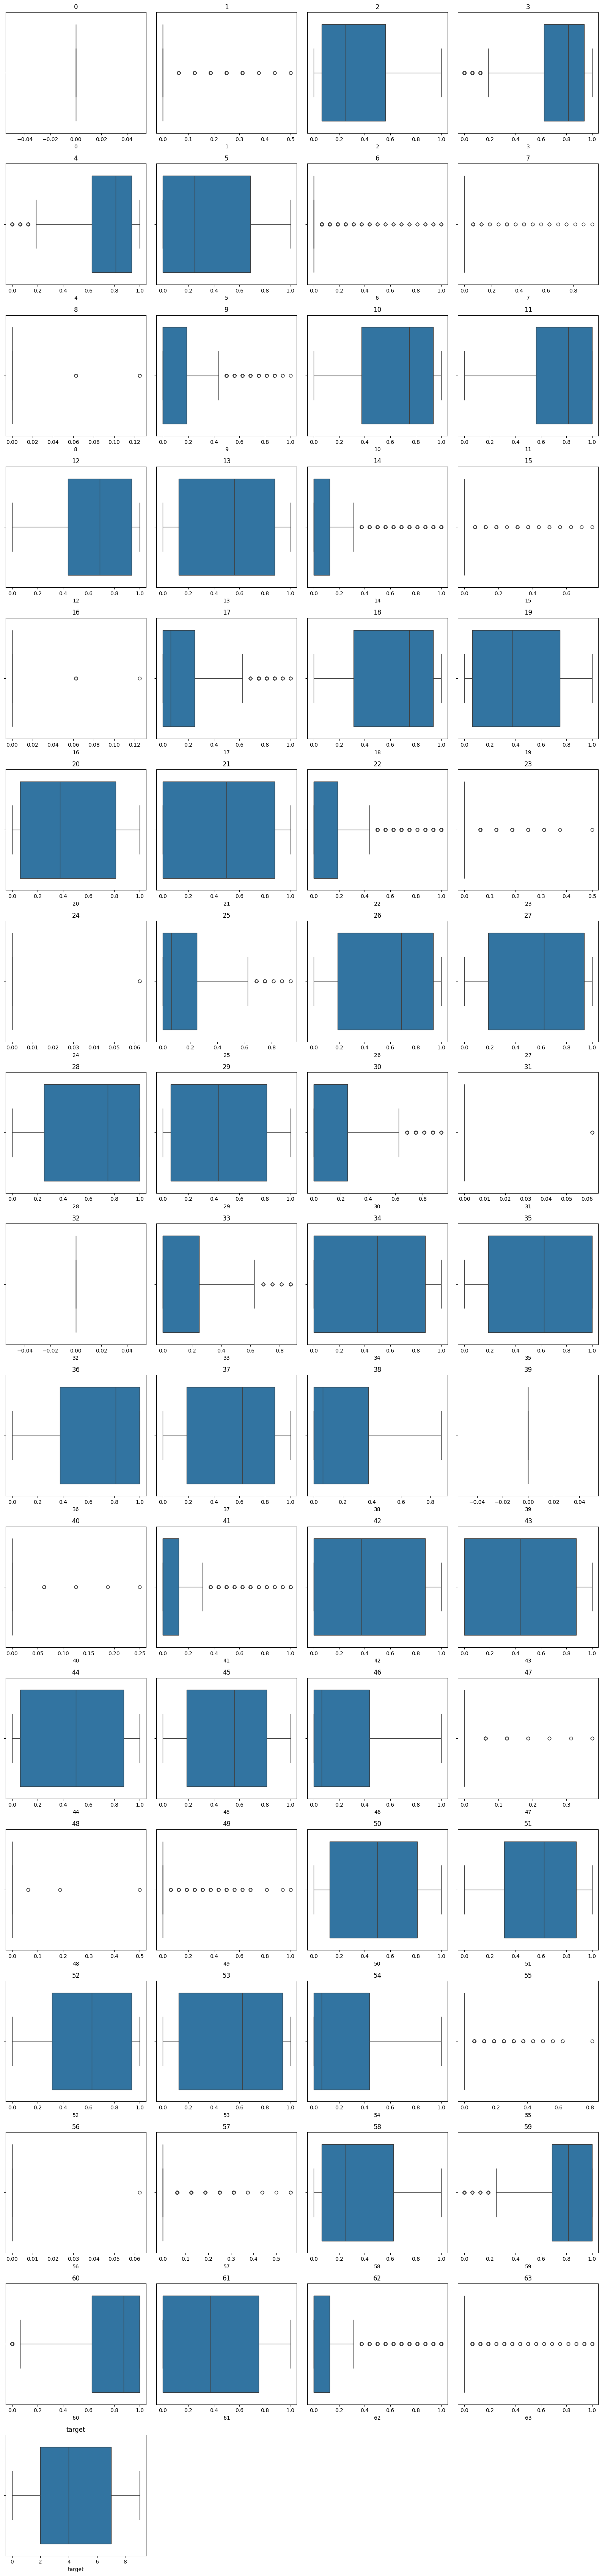

In [243]:
# Get dataset columns
cols = df.columns

# Set grid settings
n_cols = 4
n_rows = (len(cols) + n_cols - 1) // n_cols

# Init grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()

# Draw boxplot
for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

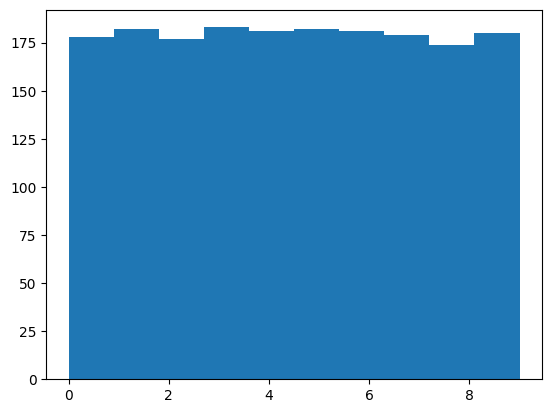

In [244]:
df['target']
plt.hist(df['target'],bins=10)

### Clear dataset

In [245]:
df2 = df.drop_duplicates() # remove duplicated values

X = df2.drop(columns="target") # drop column to predict
y = df2['target']

### Display the datarange

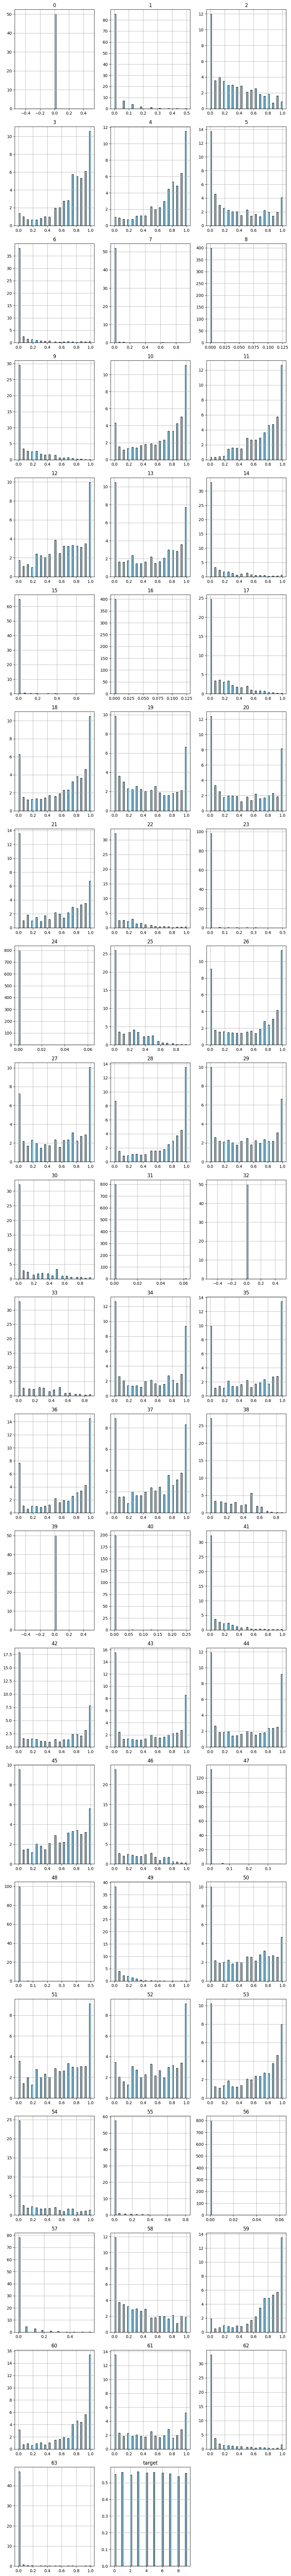

In [246]:
cols = df.columns

n_cols = 3
n_rows = (len(cols) + 1) // n_cols  # compute rows needed

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=50, density=True, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

###  Verify if data can be clustered (PCA + KMeans)

### Common function

In [ ]:
# Split dataset (note: y not used for fitting but used for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [248]:
# Create a kmeans pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=2)), # Reduce datas to 2D
    ('kmeans', KMeans(n_clusters=10, random_state=42)) # Group data in 10 clusters
])

# Fit only on X (unsupervised learning)
pipeline.fit(X_train)

# Get prediction result
y_pred = pipeline.predict(X_test)

# Get pca to compute silhouette metric
X_test_pca = pipeline.named_steps['pca'].transform(X_test)


In [249]:
print("-"*40)

print("ari          : ", adjusted_rand_score(y_test, y_pred)) # cluster similarity
print("homogeneity  : ", homogeneity_score(y_test, y_pred)) # cluster homogeneity (contain only one class)
print("completeness : ", completeness_score(y_test, y_pred)) # All items of on class are in the same cluster
print("silhouette   : ", silhouette_score(X_test_pca, y_pred)) # All items of on class are in the same cluster

print("-"*40)

----------------------------------------
ari          :  0.3746600026039957
homogeneity  :  0.5531298307226344
completeness :  0.5608927189221624
silhouette   :  0.3960279795481213
----------------------------------------


### Unsupervised clustering with DBSCAN

In [250]:
# Create a DBSCAN pipeline
pipeline2 = Pipeline([
    ('pca', PCA(n_components=2)), # Reduce datas to 2D
    ('dbscan', DBSCAN(eps=3, min_samples=5))
])

# Fit only on X (unsupervised learning)
pipeline2.fit(X_train)

# Get pca to compute silhouette metric from data direclty
X_pca_train = pipeline2.named_steps['pca'].transform(X_train)
clusters_train = pipeline2.named_steps["dbscan"].labels_

# Mask for non-noise points (DBSCAN assigns -1 to noise)
mask = clusters_train != -1

In [251]:
print("-"*50)

print("ari : ", adjusted_rand_score(y_train[mask], clusters_train[mask]))

if len(set(clusters_train[mask])) >= 2:
    print("silhouette : ", silhouette_score(X_pca_train[mask], clusters_train[mask]))
else:
    print("silhouette_score undefined cause (clusters < 2)")

print("-"*50)

--------------------------------------------------
ari :  0.0
silhouette_score undefined cause (clusters < 2)
--------------------------------------------------


### Create a Logistic regression model

In [252]:
# make all columns with same mean (between 0 - 1)
# Cause mean of tax is 408 and mean of crim is 3.614
transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Create linear regrassion pipeline
my_pipeline = Pipeline([
    ("transformer", transformer),
    ("model", LogisticRegression())
])

# Split dataset (train and test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Init model 
my_pipeline.fit(X_train, y_train)

# Get prediction result
y_pred = my_pipeline.predict(X_test)

### Get LogisticRegression model performance

In [253]:
print("-"*30)

print("MAE : ", mean_absolute_error(y_test, y_pred)) 
print("MSE : ", mean_squared_error(y_test, y_pred))
print("R² : ", r2_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("-"*30)

------------------------------
MAE :  0.1388888888888889
MSE :  0.8666666666666667
R² :  0.8943801037392001
Accuracy: 0.9722222222222222
------------------------------


In [254]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Create a CNN model

In [ ]:
# Restore X from previous update
X, y = digits.images, digits.target
X = X / 16.0  # Normalise pixel between 0 and 1

# # Doesn't work
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# y contain classes (0 à 9). to_categorical transform classes to binary vector with length of 10
y_cat = to_categorical(y, num_classes=10)

# Split data and stratify=y to set same proportion in each fold
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

# Create CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(), # 2D - 1D (vector)
    Dense(64, activation='relu'),
    Dropout(0.3), # disabled 30% of neurons to avoid overfitting
    Dense(10, activation='softmax') # 10 neurons to predict value between 0 and 9
])

# Compile model "categorical_crossentropy" -> cause of to_categorical
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

# Predict
y_pred_probs = model.predict(X_test)  

# % to classes
y_pred = np.argmax(y_pred_probs, axis=1)           
y_true = np.argmax(y_test, axis=1)

Epoch 1/15


/home/thomas/atlas/projects/MNIST/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1650 - loss: 2.2568 - val_accuracy: 0.6111 - val_loss: 2.0070
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4693 - loss: 1.8976 - val_accuracy: 0.7986 - val_loss: 1.4337
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7145 - loss: 1.3149 - val_accuracy: 0.8750 - val_loss: 0.8508
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7942 - loss: 0.8523 - val_accuracy: 0.9097 - val_loss: 0.5208
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8409 - loss: 0.6304 - val_accuracy: 0.9028 - val_loss: 0.4212
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8843 - loss: 0.4484 - val_accuracy: 0.9167 - val_loss: 0.3167
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.4193 - val_accuracy: 0.9583 - val_loss: 0.2505
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.3116 - val_accuracy: 0.9444 - val_loss: 0.2165
Epo

In [274]:
print("-"*30)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification : ", classification_report(y_true, y_pred))

print("-"*30)

------------------------------
Accuracy: 0.9611111111111111
Classification :                precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.87      0.92      0.89        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.97      0.80      0.88        35
           9       0.94      0.94      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

------------------------------


<Axes: >

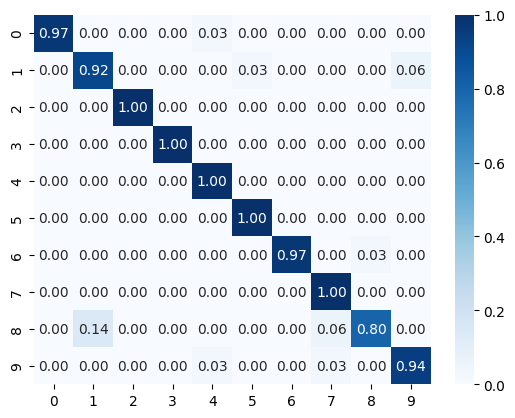

In [273]:
cm = confusion_matrix(y_true, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')